In [5]:
#importing matrix library
import numpy as np
#importing tabular library
import pandas as pd
#train_test_split
from sklearn.model_selection import train_test_split
#for scaling the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
#MLPRegressor
from sklearn.neural_network import MLPRegressor
#RandomForest
from sklearn.ensemble import RandomForestRegressor
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/crowdedness-at-the-campus-gym/data.csv')
#showing the dataset
df

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


# Getting the Preliminary Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


# Checking for Correlation Matrix

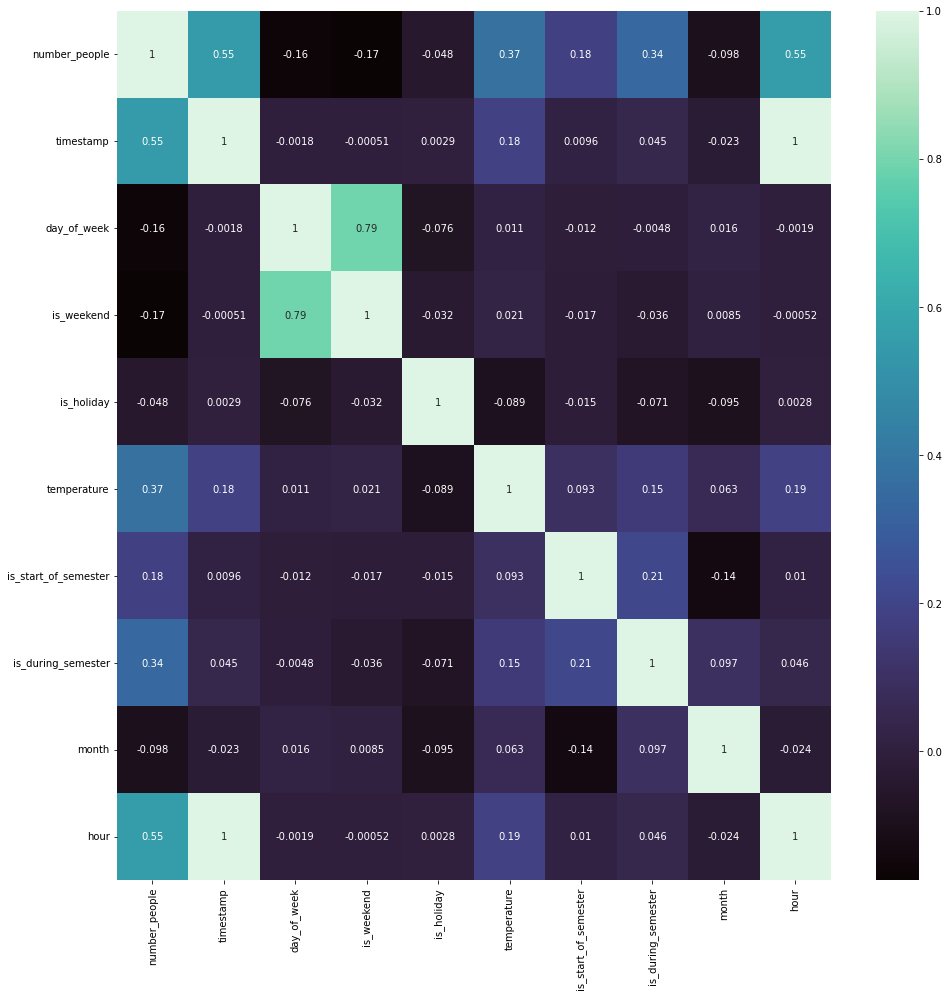

In [6]:
plt.figure(figsize=(16,16))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='mako')
plt.show()

In [18]:
df['date'].head(1)

0    2015-08-14 17:00:11-07:00
Name: date, dtype: object

# Creating the Preprocess Input

In [29]:
def preprocess_inputs(df):
    df=df.copy()
    #Extracting data feature from the date column
    df['Year']=df['date'].apply(lambda x:x[0:4])
 
    df['Day']=df['date'].apply(lambda x:x[-2:])
    df=df.drop('date',axis=1)
    y=df['number_people']
    x=df.drop('number_people',axis=1)
    scaler=StandardScaler()
    pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    return x_train,x_test,y_train,y_test

0      8775
1      3029
29     1229
31     1215
27     1192
       ... 
145       1
123       1
121       1
125       1
138       1
Name: number_people, Length: 128, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43528, 11)
(18656, 11)
(43528,)
(18656,)


In [31]:
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6017396818613294

In [40]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9327762155958544

In [35]:
model.predict(x_test)

array([52.46, 22.3 , 43.64, ..., 25.93,  0.43, 52.82])

In [36]:
y_test

23310    55
1766     24
6026     46
19796    56
33050    18
         ..
8498     75
43514    50
59746    19
58113     0
4423     39
Name: number_people, Length: 18656, dtype: int64

model=MLPRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test

In [39]:
model=MLPRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.45134195325914184